In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/dk/ht9wngxs4r51l9tbk0_y94000000gp/T/ipykernel_61288/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Natural Language Processing

## 4. Text representation
Once text is analyzed based on regular expressions and cleaned by filtering using some of the previous tools, we can proceed to represent it in order to perform posterior analyses.

We need to start thinking about how to translate collections of texts into quantifiable phenomena.  

Some classical aproaches:
<code>
    One-Hot encoding or Bag of Words
    Tf-IDF
</code>

<img src="https://miro.medium.com/max/1800/1*ArM6Z5jeptCQ082DYn9nDQ.png">


We can think about word frequencies.

Example with histograms of **visual words representation**:
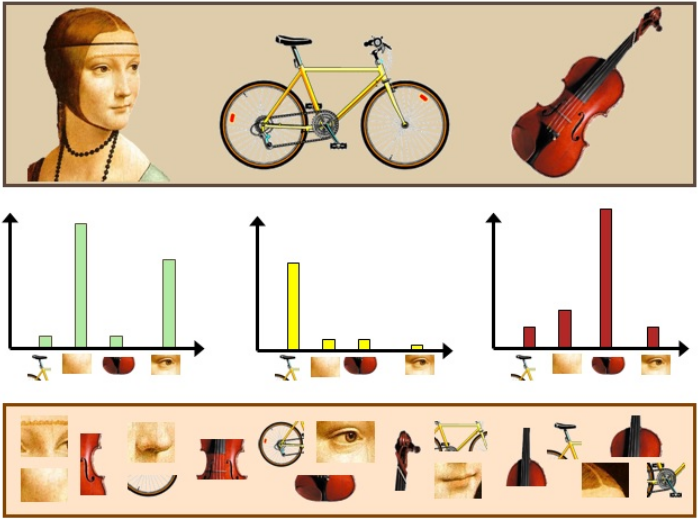


## 4.1 TF-IDF: Term frequencies (counter)
First, let's review how to get a count of terms per document: a term frequency vector.

In [2]:
mydoclist = ['Julie loves me more than Linda loves me',
'Jane likes me more than Julie loves me',
'He likes basketball more than baseball']

from collections import Counter

for doc in mydoclist:
    tf = Counter()
    for word in doc.split():
        tf[word] +=1
    print (tf.items())

dict_items([('Julie', 1), ('loves', 2), ('me', 2), ('more', 1), ('than', 1), ('Linda', 1)])
dict_items([('Jane', 1), ('likes', 1), ('me', 2), ('more', 1), ('than', 1), ('Julie', 1), ('loves', 1)])
dict_items([('He', 1), ('likes', 1), ('basketball', 1), ('more', 1), ('than', 1), ('baseball', 1)])


Let's call this a first stab at representing documents quantitatively, just by their word counts (also thinking that we may have previously filtered and cleaned the text using previous approaches).

In [3]:
def build_lexicon(corpus): # define a set with all possible words included in all the sentences or "corpus"
    lexicon = set()
    for doc in corpus:
        lexicon.update([word for word in doc.split()])
    return lexicon

def freq(term, document):
    return document.split().count(term)

def tf(term, document):
    return freq(term, document)


vocabulary = build_lexicon(mydoclist)
doc_term_matrix = []
print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']\n')

for doc in mydoclist:    
    print ('The doc is "' + doc + '"')
    tf_vector = [tf(word, doc) for word in vocabulary]
    tf_vector_string = ', '.join(format(freq, 'd') for freq in tf_vector) # convert the list into a string to print it
    
    print ('The tf vector for Document %d is [%s]|\n' % ((mydoclist.index(doc)+1), tf_vector_string))
    doc_term_matrix.append(tf_vector)

print ('\nAll combined, here is our master document term matrix: ')
print (doc_term_matrix)

Our vocabulary vector is [baseball, Jane, He, Linda, me, Julie, likes, basketball, than, more, loves]

The doc is "Julie loves me more than Linda loves me"
The tf vector for Document 1 is [0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2]|

The doc is "Jane likes me more than Julie loves me"
The tf vector for Document 2 is [0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1]|

The doc is "He likes basketball more than baseball"
The tf vector for Document 3 is [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]|


All combined, here is our master document term matrix: 
[[0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2], [0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]]


Okay, that seems reasonable enough. If any of you have any experience with machine learning, what you've just seen is the creation of a feature space. Now every document is in the same feature space, meaning that we can represent the entire corpus in the same dimensional space without having lost too much information.

In [4]:
import numpy as np
from scipy.spatial import distance_matrix

distance_matrix(np.array(doc_term_matrix),np.array(doc_term_matrix))

array([[0.        , 2.        , 3.74165739],
       [2.        , 0.        , 3.16227766],
       [3.74165739, 3.16227766, 0.        ]])

## 4.2 Vector normalization
Once you've got your data in the same feature space, you can start applying some machine learning methods; classifying, clustering, and so on. But actually, we've got a few problems. Words aren't all equally informative.

If words appear too frequently in a single document, they're going to muck up our analysis. We want to perform some scaling of each of these term frequency vectors into something a bit more representative. In other words, we need to do some vector normalizing.

One possibility is to ensure that the L2 norm of each vector is equal to 1. Here's some code that shows how this is done.



In [5]:
import math

def l2_normalizer(vec):
    denom = np.sum([el**2 for el in vec])
    return [(el / math.sqrt(denom)) for el in vec]

doc_term_matrix_l2 = []
for vec in doc_term_matrix:
    doc_term_matrix_l2.append(l2_normalizer(vec))

print('A regular old document term matrix: ') 
print(np.matrix(doc_term_matrix))
print('\nA document term matrix with row-wise L2 norms of 1:')
print(np.around(np.matrix(doc_term_matrix_l2),3))

A regular old document term matrix: 
[[0 0 0 1 2 1 0 0 1 1 2]
 [0 1 0 0 2 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 1 1 1 0]]

A document term matrix with row-wise L2 norms of 1:
[[0.    0.    0.    0.289 0.577 0.289 0.    0.    0.289 0.289 0.577]
 [0.    0.316 0.    0.    0.632 0.316 0.316 0.    0.316 0.316 0.316]
 [0.408 0.    0.408 0.    0.    0.    0.408 0.408 0.408 0.408 0.   ]]


In [6]:
print("Now:")
print(distance_matrix(np.array(doc_term_matrix_l2),np.array(doc_term_matrix_l2)))
print("\nBefore:")
print(distance_matrix(np.array(doc_term_matrix),np.array(doc_term_matrix)))

Now:
[[0.         0.59735444 1.23636381]
 [0.59735444 0.         1.10697937]
 [1.23636381 1.10697937 0.        ]]

Before:
[[0.         2.         3.74165739]
 [2.         0.         3.16227766]
 [3.74165739 3.16227766 0.        ]]


You can see immediately that we've scaled down vectors such that each element is between [0, 1], without losing too much valuable information.

Why would we care about this kind of normalizing? Think about it this way; if you wanted to make a document seem more related to a particular topic than it actually was, you might try boosting the likelihood of its inclusion into a topic by repeating the same word over and over and over again. Frankly, at a certain point, we're getting a diminishing return on the informative value of the word. So we need to scale down words that appear too frequently in a document.

## 4.3 Feature weighting (Inverse Document Frequency)
But we're still not there yet. Just as all words aren't equally valuable within a document, **not all words are valuable across all documents**. We can try reweighting every word by its inverse document frequency. Let's see what's involved in that.
$$ idf_i = 1 + log(\frac{1+ \text{total documents}}{1 +\text{documents with term i}})$$

In [7]:
def numDocsContaining(word, doclist):
    '''Num documents containing the word'''
    doccount = 0
    for doc in doclist:
        if freq(word, doc) > 0:
            doccount +=1
    return doccount 

def idf(word, doclist):
    n_samples = len(doclist) #numer of documents
    df = numDocsContaining(word, doclist) 
    return 1 + np.log( (1+ n_samples) / (1 +float(df)) )

my_idf_vector = [idf(word, mydoclist) for word in vocabulary]

print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']\n')
print ('The inverse document frequency (IDF) vector is\n [' 
       + ', '.join(format(freq, 'f') for freq in my_idf_vector) + ']')

print()
print("Word idf in descending score:")
sorted([(idf(word, mydoclist),word) for word in vocabulary])[::-1]

Our vocabulary vector is [baseball, Jane, He, Linda, me, Julie, likes, basketball, than, more, loves]

The inverse document frequency (IDF) vector is
 [1.693147, 1.693147, 1.693147, 1.693147, 1.287682, 1.287682, 1.287682, 1.693147, 1.000000, 1.000000, 1.287682]

Word idf in descending score:


[(1.6931471805599454, 'basketball'),
 (1.6931471805599454, 'baseball'),
 (1.6931471805599454, 'Linda'),
 (1.6931471805599454, 'Jane'),
 (1.6931471805599454, 'He'),
 (1.2876820724517808, 'me'),
 (1.2876820724517808, 'loves'),
 (1.2876820724517808, 'likes'),
 (1.2876820724517808, 'Julie'),
 (1.0, 'than'),
 (1.0, 'more')]

Now we have a general sense of information values per term in our vocabulary, accounting for their relative frequency across the entire corpus. Recall that this is an inverse! The lower the value, the more frequent it is.

To get TF-IDF weighted word vectors, we have to perform the simple calculation of **tf * idf**.

In [8]:
def build_idf_matrix(idf_vector):
    idf_mat = np.zeros((len(idf_vector), len(idf_vector)))
    np.fill_diagonal(idf_mat, idf_vector)
    return idf_mat

my_idf_matrix = build_idf_matrix(my_idf_vector)
print (my_idf_matrix)
print(my_idf_matrix.shape)

[[1.69314718 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         1.69314718 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.69314718 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.69314718 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.28768207 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.28768207
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.28768207 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.69314718 0.         0.         0.        ]
 [0.         0.         0.         0.         0.

Now we have converted our IDF vector into a matrix of size BxB, where the diagonal is the IDF vector. That means we can perform now multiply every term frequency vector by the inverse document frequency matrix. Then to make sure we are also accounting for words that appear too frequently within documents, we'll normalize each document using L2 norm.

In [9]:
doc_term_matrix_tfidf = []

#performing tf-idf matrix multiplication
for tf_vector in doc_term_matrix:
    doc_term_matrix_tfidf.append(np.dot(tf_vector, my_idf_matrix))

#normalizing
doc_term_matrix_tfidf_l2 = []
for tfidf_vector in doc_term_matrix_tfidf:
    doc_term_matrix_tfidf_l2.append(l2_normalizer(tfidf_vector))
                                    
print (vocabulary)
print (np.matrix(doc_term_matrix_tfidf_l2)) # np.matrix() just to make it easier to look at

{'baseball', 'Jane', 'He', 'Linda', 'me', 'Julie', 'likes', 'basketball', 'than', 'more', 'loves'}
[[0.         0.         0.         0.38060387 0.57891811 0.28945906
  0.         0.         0.22479078 0.22479078 0.57891811]
 [0.         0.41715759 0.         0.         0.6345182  0.3172591
  0.3172591  0.         0.24637999 0.24637999 0.3172591 ]
 [0.48359121 0.         0.48359121 0.         0.         0.
  0.36778358 0.48359121 0.28561676 0.28561676 0.        ]]


In [10]:
import numpy as np
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = distance_matrix(np.array(doc_term_matrix_tfidf_l2),np.array(doc_term_matrix_tfidf_l2))
print(X)

# 4. PCA for Dimensionality Reduction and Visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)


import plotly.graph_objects as go  #for 3D plot

## 3D plot 
Scene = dict(xaxis = dict(title  = 'Feat1 -->'),yaxis = dict(title  = 'Feat2--->'),zaxis = dict(title  = 'Feat3-->'))

labels = list(range(X.shape[0] + 1)) 
trace = go.Scatter3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Now try with 30 vectors:
mydoclist = [
    'Julie loves me more than Linda loves me',
    'Jane likes me more than Julie loves me',
    'He likes basketball more than baseball',
    'Soccer is less popular than basketball in some countries',
    'Tom prefers soccer over football on weekends',
    'Football games are louder than soccer matches',
    'I enjoy movies more than concerts',
    'Cindy watches movies more often than she attends concerts',
    'Concerts can be more thrilling than watching movies',
    'Cooking at home is healthier than eating out',
    'Many prefer home-cooked meals over fast food',
    'Fast food is convenient but not always healthy',
    'Reading books enriches the mind more than watching TV',
    'Libraries stock more books than magazines',
    'She reads newspapers more frequently than books',
    'Traveling by train is more scenic than by car',
    'Cars are more convenient for short trips than trains',
    'Trains are preferred over cars for long-distance travel in Europe',
    'Coding in Python is more versatile than in Java',
    'Java is as popular as Python among enterprise applications',
    'Python has a simpler syntax than Java',
    'Artificial intelligence is transforming industries faster than expected',
    'Machine learning is a subset of artificial intelligence',
    'Deep learning dives deeper than traditional machine learning methods',
    'The ocean is deeper than the surface appears',
    'Mountain climbing is riskier than hiking',
    'Hiking trails are less crowded than city parks',
    'City parks offer more activities than rural parks',
    'Rural areas are quieter than urban areas',
    'Urban living provides more convenience but less tranquility than rural living'
]


[[0.         0.70199354 1.32029692]
 [0.70199354 0.         1.21866879]
 [1.32029692 1.21866879 0.        ]]



<strong>Tf-IDF</strong>
    
The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today.
    
<ul>
<li>The inverse document frequency is a measure of how much information the word provides</li>
<li>A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents</li>
<li>As a term appears in more documents, the ratio inside the logarithm approaches 1, bringing the idf and tf–idf closer to 0</li>
    
</ul>
    
</div>

## 4.4 TF IDF Sklearn implementation

Now let's see an efficient implementation of the previous approach using scikits-learn, which ensures that you don't have to worry about the efficiency of all the previous steps.

**NOTE**: The values you get from the TfidfVectorizer/TfidfTransformer will be different than what we have computed by hand. This is because scikits-learn uses an adapted version of Tfidf to deal with divide-by-zero errors.

### (EXTRA) Still requires some code

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer (min_df = 1)#(min_df=0.1,max_df=0.7)
tfidf = TfidfTransformer(norm="l2")

term_freq_matrix = count_vectorizer.fit_transform(mydoclist)
tfidf.fit(term_freq_matrix)
tf_idf_matrix = tfidf.transform(term_freq_matrix)

print ("Vocabulary:", count_vectorizer.vocabulary_,'\n')
print(mydoclist)
print()
print (tf_idf_matrix.todense())

import pandas as pd
# print idf values
df_idf = pd.DataFrame(tfidf.idf_, index=count_vectorizer.get_feature_names_out(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

Vocabulary: {'julie': 60, 'loves': 69, 'me': 74, 'more': 78, 'than': 112, 'linda': 65, 'jane': 58, 'likes': 64, 'he': 49, 'basketball': 12, 'baseball': 11, 'soccer': 106, 'is': 57, 'less': 62, 'popular': 91, 'in': 54, 'some': 107, 'countries': 29, 'tom': 115, 'prefers': 94, 'over': 89, 'football': 44, 'on': 87, 'weekends': 130, 'games': 47, 'are': 5, 'louder': 68, 'matches': 73, 'enjoy': 36, 'movies': 80, 'concerts': 24, 'cindy': 20, 'watches': 128, 'often': 86, 'she': 103, 'attends': 10, 'can': 17, 'be': 13, 'thrilling': 114, 'watching': 129, 'cooking': 28, 'at': 9, 'home': 53, 'healthier': 50, 'eating': 35, 'out': 88, 'many': 72, 'prefer': 92, 'cooked': 27, 'meals': 75, 'fast': 41, 'food': 43, 'convenient': 26, 'but': 15, 'not': 82, 'always': 1, 'healthy': 51, 'reading': 98, 'books': 14, 'enriches': 37, 'the': 113, 'mind': 77, 'tv': 125, 'libraries': 63, 'stock': 108, 'magazines': 71, 'reads': 99, 'newspapers': 81, 'frequently': 46, 'traveling': 123, 'by': 16, 'train': 118, 'scenic':

,idf_weights
than,1.215111
more,1.725937
is,2.036092
are,2.642228
python,3.047693
...,...
europe,3.740840
enterprise,3.740840
enriches,3.740840
healthy,3.740840


### TFIDF Scikit Learn Direct way



In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 1)
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)


for doc,tf_idf_doc in zip(mydoclist,tfidf_matrix.todense()):
    print("DOC:", doc)
    print(np.around(tf_idf_doc,3)) # El tres define los decimales
    print()

DOC: Julie loves me more than Linda loves me
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.306 0.    0.    0.    0.    0.344 0.    0.    0.    0.613 0.    0.
  0.    0.    0.613 0.    0.    0.    0.159 0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.112 0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]

DOC: Jane likes me more than Julie loves me
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 

And we can fit new observations into this vocabulary space like so:


In [13]:
new_docs = ['He watches basketball and baseball', 
            'Julie likes to play basketball', 
            'Jane loves to play baseball']

new_term_freq_matrix = tfidf_vectorizer.transform(new_docs)
print()
print (tfidf_vectorizer.vocabulary_)
print()

for doc,tf_idf_doc in zip(new_docs,new_term_freq_matrix.todense()):
    print("DOC:", doc)
    print(np.around(tf_idf_doc,3))
    print()


{'julie': 60, 'loves': 69, 'me': 74, 'more': 78, 'than': 112, 'linda': 65, 'jane': 58, 'likes': 64, 'he': 49, 'basketball': 12, 'baseball': 11, 'soccer': 106, 'is': 57, 'less': 62, 'popular': 91, 'in': 54, 'some': 107, 'countries': 29, 'tom': 115, 'prefers': 94, 'over': 89, 'football': 44, 'on': 87, 'weekends': 130, 'games': 47, 'are': 5, 'louder': 68, 'matches': 73, 'enjoy': 36, 'movies': 80, 'concerts': 24, 'cindy': 20, 'watches': 128, 'often': 86, 'she': 103, 'attends': 10, 'can': 17, 'be': 13, 'thrilling': 114, 'watching': 129, 'cooking': 28, 'at': 9, 'home': 53, 'healthier': 50, 'eating': 35, 'out': 88, 'many': 72, 'prefer': 92, 'cooked': 27, 'meals': 75, 'fast': 41, 'food': 43, 'convenient': 26, 'but': 15, 'not': 82, 'always': 1, 'healthy': 51, 'reading': 98, 'books': 14, 'enriches': 37, 'the': 113, 'mind': 77, 'tv': 125, 'libraries': 63, 'stock': 108, 'magazines': 71, 'reads': 99, 'newspapers': 81, 'frequently': 46, 'traveling': 123, 'by': 16, 'train': 118, 'scenic': 102, 'car'

Note that we didn't get words like **'watches**' in the new_term_freq_matrix. That's because we trained the object on the documents in mydoclist, and that word doesn't appear in the vocabulary from that corpus. In other words, it's out of the lexicon.

In [14]:
## TfIDF has a lot of parameters. Check some of them
tfidf_vectorizer = TfidfVectorizer(min_df = 1,max_df =0.5, ngram_range=(1,2)) 
# ngram_range es bueno para sentiment analysis, puede capturar dos palabras juntas
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)


for doc,tf_idf_doc in zip(mydoclist,tfidf_matrix.todense()):
    print("DOC:", doc)
    print(np.around(tf_idf_doc,3))
    print()

print("The dictionary")
print (tfidf_vectorizer.vocabulary_)

DOC: Julie loves me more than Linda loves me
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.225 0.225 0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.253 0.253 0.    0.
  0.    0.    0.    0.    0.451 

In [15]:
## TfIDF has a lot of parameters. Check some of them
tfidf_vectorizer = TfidfVectorizer(min_df = 1,max_df =0.5,ngram_range=(1,2))
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)


for doc,tf_idf_doc in zip(mydoclist,tfidf_matrix.todense()):
    print("DOC:", doc)
    print(np.around(tf_idf_doc,3))
    print()

print("The dictionary contains", len(tfidf_vectorizer.vocabulary_),"words")
print (tfidf_vectorizer.vocabulary_)

DOC: Julie loves me more than Linda loves me
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.225 0.225 0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.253 0.253 0.    0.
  0.    0.    0.    0.    0.451 

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joaorochaemelo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
## TfIDF has a lot of parameters. Check some of them
tfidf_vectorizer = TfidfVectorizer(min_df = 1,max_df =0.5,ngram_range=(1,2),stop_words=stopwords.words('english'))
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)

# Ahora gracias al stop words, salen menos palabras

for doc,tf_idf_doc in zip(mydoclist,tfidf_matrix.todense()):
    print("DOC:", doc)
    print(np.around(tf_idf_doc,3))
    print()

print("The dictionary contains", len(tfidf_vectorizer.vocabulary_),"words")
print (tfidf_vectorizer.vocabulary_)

DOC: Julie loves me more than Linda loves me
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.32  0.32
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.359 0.359 0.    0.    0.    0.    0.    0.    0.64  0.359 0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.  